In [51]:
%pylab inline
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [52]:
# we get the path for the inidividual behavioral data files
behavdata_dir='/home/coateslab/LabData/TSLO_Experiment/TSLO_behav/'
behavdir_list=[]
for root,dirs,file in os.walk(behavdata_dir):
    behavdir_list.append(root)

In [53]:
failedFiles=[]
behavData=[]

num_elements=len(behavdir_list)
for foldername in behavdir_list:
    # we find subject ID
    subj_id=foldername[foldername.find('S0'):foldername.find('S0')+3]
    filelist=os.listdir(foldername)
    for filename in filelist:
        if 'Crowding' in filename and 'CrowdingQuest' not in filename and 'CrowdingThresh' not in filename:
            # First we load the mat file into jupyter
            tempData=pd.read_csv(os.path.join(foldername,filename))
            tempData['filename']=filename
            tempData['code']='%s'%(filename[0:filename.find('_Crowding')])
            tempData['subj_id']=subj_id
            #The temporary data is then appended to the bigger data structure 
            behavData.append(tempData)
            
behavData=pd.concat(behavData)

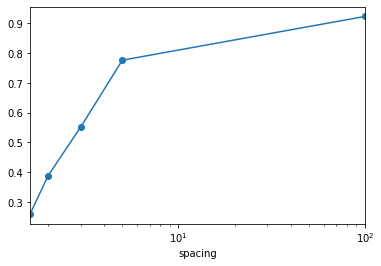

In [49]:
behavData.query("ecc=='5'").groupby(['spacing'])['corr'].mean().plot(marker='o')
plt.xscale('log')

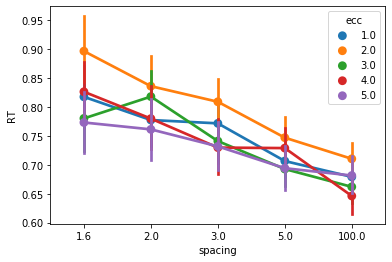

In [50]:
sns.pointplot(x='spacing',y='RT',hue='ecc',data=behavData)
# plt.xlabel('Eccentricity (deg)',size=12)
# plt.ylabel('Stimulus Duration (ms)',size=12)

Text(0, 0.5, 'Stimulus Duration (ms)')

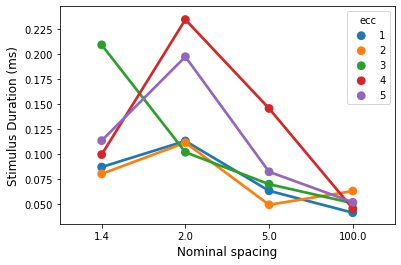

In [27]:
sns.pointplot(x='spacing',y='stim_dur',hue='ecc',data=lastTrial)
plt.xlabel('Nominal spacing',size=12)
plt.ylabel('Stimulus Duration (ms)',size=12)

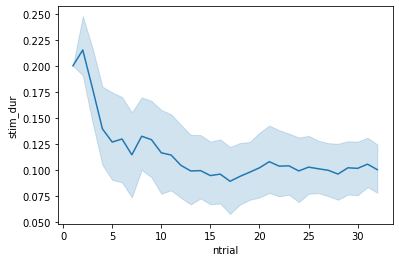

In [24]:
sns.lineplot(x='ntrial',y='stim_dur',data=stimDurDF)